In [1]:
%load_ext autoreload
%autoreload 2

import plotter
import analysis
import lmpsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

## Summary

This week is mainly a "testing" week, where we want to review different techniques used by other that are to be used in the future :

**1. HPS-T Model** : Check if we can reproduce the CspTm and Integrase radius' of gyration from the Dignon paper.


**2. Debye as a function of T** : We also want to compare the Debye Wavelength effect when having the correct T dependance or not. 


**3. Slab method** : Implement a simple slab method on LAMMPS, and performance


**4. Contacts** : Check if we can reproduce the contact map from the LAF-1-RGG protein also from a Dignon paper


**5. Tc of CPEB4's** : Check if we can get the critical temperature for all constructs for an expanded temperature range (at CSUC)

In [27]:
p = plotter.Plotter()
# p.index

### 1. HPS-T Model

> Run Completed at 100.00% for CspTm. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


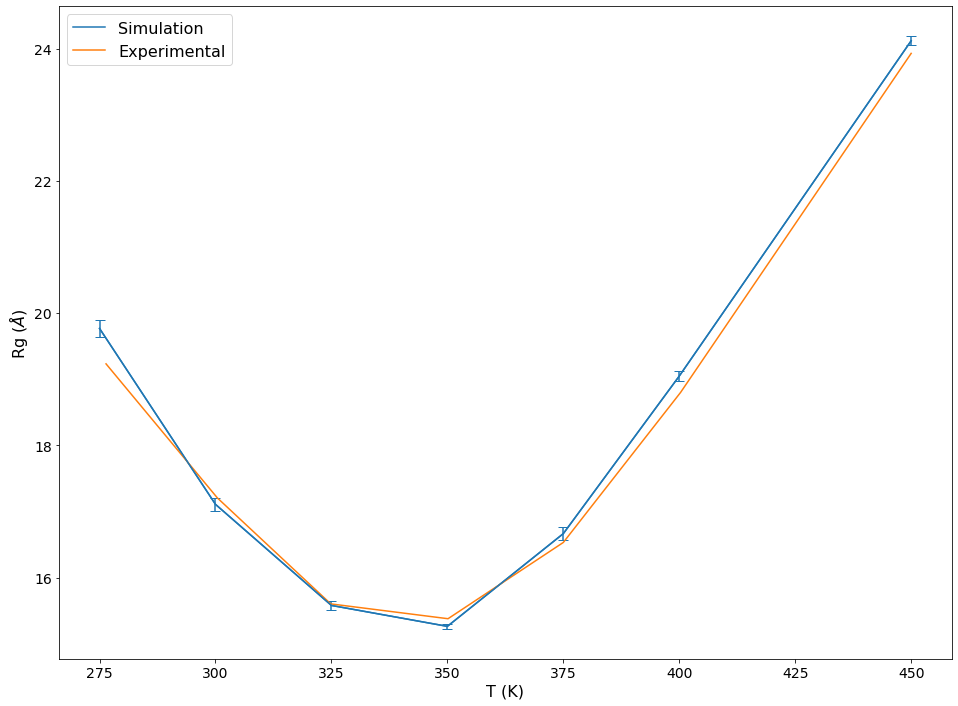

In [26]:
# CspTm

rg_T = []
p.clean('rg_csp')
rg_exp = np.genfromtxt('/home/adria/documents/csp.txt')
rg = p.plot(observable='rg', index=7, plot_id='rg_csp', label='Simulation')
p.plots['rg_csp'][1].plot(rg_exp[:,0], rg_exp[:,1]*10, label='Experimental')
p.plots['rg_csp'][1].legend(fontsize=16)

> Run Completed at 100.00% for CspTm. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


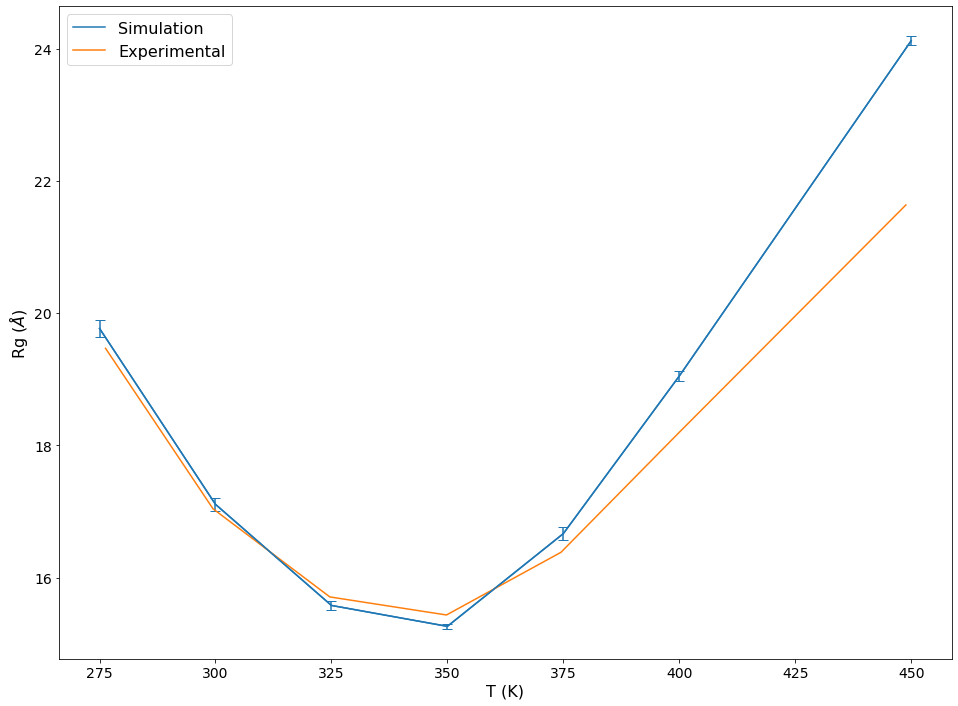

In [27]:
# Integrase

rg_T = []
p.clean('rg_integrase')
rg = p.plot(observable='rg', index=7, plot_id='rg_integrase', label='Simulation')
rg_exp = np.genfromtxt('/home/adria/documents/integrase.txt')
p.plots['rg_integrase'][1].plot(rg_exp[:,0], rg_exp[:,1]*10, label='Experimental')
p.plots['rg_integrase'][1].legend(fontsize=16)

These differences do look like a difference created by the fact that my Debye Screening Wavevector depends on the temperature. To complete this, let's run a case with constant Debye Screening Wavevector

> Run Completed at 100.00% for CspTm. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


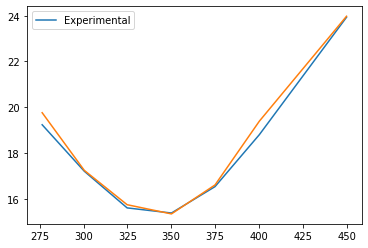

In [28]:
# CspTm

rg_T = []
p.clean('rg_csp')
rg_exp = np.genfromtxt('/home/adria/documents/csp.txt')
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T_Test/CT-CspTm').rg()
plt.plot(rg_exp[:,0], rg_exp[:,1]*10, label='Experimental')
plt.plot(rg_exp[:,0], rg.mean(axis=1))
plt.legend()

> Run Completed at 100.00% for Integrase. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


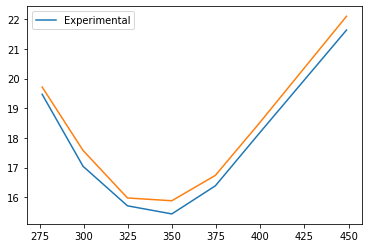

In [29]:
# Integrase

rg_T = []
p.clean('rg_csp')
rg_exp = np.genfromtxt('/home/adria/documents/integrase.txt')
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T_Test/CT-Integrase').rg()
plt.plot(rg_exp[:,0], rg_exp[:,1]*10, label='Experimental')
plt.plot(rg_exp[:,0], rg.mean(axis=1))
plt.legend()

Let's attempt it for **single chain and dimeric CPEB4**

In [46]:
# CPEB4

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/WT',
                  chains=1,
                  protein='CPEB4',
                  host='@perdiu38',
                  temper=False)
d.processors = 2
d.temperatures=[275,300,325,350,375,400,450,500]
d.write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/WT for CPEB4     ║
║------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                             ║
║       - Model = HPS                                                                      ║
║       - Chains = 1                                                                       ║
║       - Ionic Strength (mM) = 0.1                                                        ║
║       - Medium Permittivity = 80.0                                                       ║
║       - Temperatures (K) = [275, 300, 325, 350, 375, 400, 450, 500]                      ║
║       - HPS Scale = 1.0                                                                  ║
╚═════════════════════════════════════════════════════════════════════

In [47]:
# 7D

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/7D',
                  chains=1,
                  protein='7D_CPEB4',
                  host='@perdiu40',
                  temper=False)
d.processors = 2
d.temperatures=[275,300,325,350,375,400,450,500]
d.write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/7D for 7D_CPEB4     ║
║---------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                ║
║       - Model = HPS                                                                         ║
║       - Chains = 1                                                                          ║
║       - Ionic Strength (mM) = 0.1                                                           ║
║       - Medium Permittivity = 80.0                                                          ║
║       - Temperatures (K) = [275, 300, 325, 350, 375, 400, 450, 500]                         ║
║       - HPS Scale = 1.0                                                                     ║
╚═══════════════════════════════════════

In [50]:
# 12D

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/12D',
                  chains=1,
                  protein='12D_CPEB4_D4',
                  host='@perdiu34',
                  temper=False)
d.processors = 2
d.temperatures=[275,300,325,350,375,400,450,500]
d.write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/12D for 12D_CPEB4_D4     ║
║--------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                     ║
║       - Model = HPS                                                                              ║
║       - Chains = 1                                                                               ║
║       - Ionic Strength (mM) = 0.1                                                                ║
║       - Medium Permittivity = 80.0                                                               ║
║       - Temperatures (K) = [275, 300, 325, 350, 375, 400, 450, 500]                              ║
║       - HPS Scale = 1.0                                                                  

In [49]:
# D4

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/D4',
                  chains=1,
                  protein='CPEB4_D4',
                  host='@perdiu39',
                  temper=False)
d.processors = 2
d.temperatures=[275,300,325,350,375,400,450,500]
d.write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/D4 for CPEB4_D4     ║
║---------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                ║
║       - Model = HPS                                                                         ║
║       - Chains = 1                                                                          ║
║       - Ionic Strength (mM) = 0.1                                                           ║
║       - Medium Permittivity = 80.0                                                          ║
║       - Temperatures (K) = [275, 300, 325, 350, 375, 400, 450, 500]                         ║
║       - HPS Scale = 1.0                                                                     ║
╚═══════════════════════════════════════

### 2. Debye as a function of T

Now with **correct T dependence**...

In [64]:
# CPEB4

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-TT/WT',
                  chains=1,
                  protein='CPEB4',
                  host='@perdiu42',
                  use_temp_eps=True,
                  temper=False)
d.processors = 1
d.temperatures=[275,300,325,350,375]
d.write_hps_files()

87.00172753790874
77.62874992103374
69.28855292915875
61.84894906228374
55.647999999999996
╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-TT/WT for CPEB4     ║
║-------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                              ║
║       - Model = HPS                                                                       ║
║       - Chains = 1                                                                        ║
║       - Ionic Strength (mM) = 0.1                                                         ║
║       - Medium Permittivity = 80.0                                                        ║
║       - Temperatures (K) = [275, 300, 325, 350, 375]                                      ║
║       - HPS Scale = 1.0                                      

In [65]:
# 7D

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-TT/7D',
                  chains=1,
                  protein='7D_CPEB4',
                  host='@perdiu42',
                  use_temp_eps=True,
                  temper=False)
d.processors = 1
d.temperatures=[275,300,325,350,375]
d.write_hps_files()

87.00172753790874
77.62874992103374
69.28855292915875
61.84894906228374
55.647999999999996
╔══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-TT/7D for 7D_CPEB4     ║
║----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                 ║
║       - Model = HPS                                                                          ║
║       - Chains = 1                                                                           ║
║       - Ionic Strength (mM) = 0.1                                                            ║
║       - Medium Permittivity = 80.0                                                           ║
║       - Temperatures (K) = [275, 300, 325, 350, 375]                                         ║
║       - HPS Scale = 1.0           

In [66]:
# 12D

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-TT/12D',
                  chains=1,
                  protein='12D_CPEB4_D4',
                  host='@perdiu42',
                  use_temp_eps=True,
                  temper=False)
d.processors = 1
d.temperatures=[275,300,325,350,375]
d.write_hps_files()

87.00172753790874
77.62874992103374
69.28855292915875
61.84894906228374
55.647999999999996
╔═══════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-TT/12D for 12D_CPEB4_D4     ║
║---------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                      ║
║       - Model = HPS                                                                               ║
║       - Chains = 1                                                                                ║
║       - Ionic Strength (mM) = 0.1                                                                 ║
║       - Medium Permittivity = 80.0                                                                ║
║       - Temperatures (K) = [275, 300, 325, 350, 375]                                       

In [67]:
# D4

d = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-TT/D4',
                  chains=1,
                  protein='CPEB4_D4',
                  host='@perdiu42',
                  use_temp_eps=True,
                  temper=False)
d.processors = 1
d.temperatures=[275,300,325,350,375,400]
d.write_hps_files()

87.00172753790874
77.62874992103374
69.28855292915875
61.84894906228374
55.647999999999996
55.647999999999996
╔══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-TT/D4 for CPEB4_D4     ║
║----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                 ║
║       - Model = HPS                                                                          ║
║       - Chains = 1                                                                           ║
║       - Ionic Strength (mM) = 0.1                                                            ║
║       - Medium Permittivity = 80.0                                                           ║
║       - Temperatures (K) = [275, 300, 325, 350, 375, 400]                                    ║
║       - HPS Sca

## 3. Slab Thingy

Consider the wild type case which is self aggregating preeeety quickly and a short run since we want to do some real testing.

Things to consider: 


    - Initial configuration of the system is pretty important for convergence. That way, if proteins in the initial crystal are too far away convergence is way slower...
    
    - ??

In [53]:
canonic = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/NORMAL',
                           temper=False,
                           temperatures=[300],
                           water_perm=80,
                           chains=50,
                           protein='CPEB4')
canonic.processors=4
canonic.t = 1000000
canonic.save = 5000
canonic.write_hps_files(silent=True)

5.879


In [56]:
canonic = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/NORMAL-PAD',
                           temper=False,
                           temperatures=[300],
                           water_perm=80,
                           chains=50,
                           protein='CPEB4')
canonic.processors=4
canonic.t = 1000000
canonic.save = 5000
canonic.write_hps_files(silent=True)

### Chan's slab

*We begin each simulation by randomly placing n = 500 IDP chains in a periodic cubic
simulation box of length 70a. Subsequently, the chain configurations are energy-minimized
and then heated to a high T
∗ = 4.0 for 5, 000τ . This is followed by a compression of the
periodic simulation box (by isotropic rescaling of all chain coordinates) at a constant rate
under the same high T
∗ = 4.0 for 10, 000τ to arrive at a much smaller periodic cubic box
of length 33a, resulting in a final IDP density ρ ≈ 0.7m/a3
. The simulation box is then
expanded along the direction (labeled as z) of one of the three axes of the box by a factor
of eight with the temperature kept at a low T
∗ = 1.0, resulting in a simulation box with
dimensions 33a × 33a × 264a containing a concentration of chain population (a “slab”)
somewhere along the z-axis whereas chain population is zero or extremely sparse for other
parts of the elongated simulation box. Any conformation that is originally wrapped in the zdirection in the compressed 33a×33a×33a box because of the periodic boundary conditions
is unwrapped in this expansion process by placing the chain conformation entirely on the
side of the “slab” with larger z values (see Fig. 1 for a visualization129 of this procedure).*

In [51]:
s = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/CHAN',
                      use_random=True,
                      protein='CPEB4',
                      temperatures=[300],
                      chains=50,
                      slab=True,
                      save=500,
                      t=10000,
                      temper=False)
s.write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/CHAN for CPEB4     ║
║------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                   ║
║       - Model = HPS                                                                            ║
║       - Chains = 50                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                              ║
║       - Medium Permittivity = 80.0                                                             ║
║       - Temperatures (K) = [300]                                                               ║
║       - HPS Scale = 1.0                                                                        ║
╚═════════

In [2]:
s = lmpsetup.LMPSetup(oliba_wd='/home/adria/TEST/CHAN',
                      use_random=True,
                      protein='CPEB4',
                      temperatures=[300],
                      chains=50,
                      slab=True,
                      save=500,
                      t=10000,
                      temper=False)
s.write_hps_files()

80.00
╔════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/TEST/CHAN for CPEB4     ║
║----------------------------------------------------------------║
║   PARAMETERS                                                   ║
║       - Model = HPS                                            ║
║       - Chains = 50                                            ║
║       - Ionic Strength (mM) = 0.1                              ║
║       - Medium Permittivity = 80.0                             ║
║       - Temperatures (K) = [300]                               ║
║       - HPS Scale = 1.0                                        ║
╚════════════════════════════════════════════════════════════════╝


###  5. Tc of CPEB4's

In [30]:
d12_hps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS/12D', equil_frames=0)
wt_hps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS/WT',equil_frames=0)
d4_hps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS/D4',equil_frames=0)
d7_hps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS/7D',equil_frames=0)

> Run Completed at 10.35% for 12D_CPEB4_D4. Ran 10350000 steps for a total of 208 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 9.05% for CPEB4. Ran 9050000 steps for a total of 182 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 8.00% for CPEB4_D4. Ran 8000000 steps for a total of 161 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 8.55% for 7D_CPEB4. Ran 8550000 steps for a total of 172 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


In [31]:
d12_hps.save_last_frame()
wt_hps.save_last_frame()
d4_hps.save_last_frame()
d7_hps.save_last_frame()

In [32]:
d12_hpsT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS-HPS-T/12D', equil_frames=0)
wt_hpsT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS-HPS-T/WT',equil_frames=0)
d4_hpsT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS-HPS-T/D4',equil_frames=0)
d7_hpsT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CARLA-RUNS-HPS-T/7D',equil_frames=0)

> Run Completed at 13.30% for 12D_CPEB4_D4. Ran 13300000 steps for a total of 267 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 7.45% for CPEB4. Ran 7450000 steps for a total of 150 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 8.10% for CPEB4_D4. Ran 8100000 steps for a total of 163 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 10.20% for 7D_CPEB4. Ran 10200000 steps for a total of 205 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


In [34]:
d12_hpsT.save_last_frame()
wt_hpsT.save_last_frame()
d4_hpsT.save_last_frame()
d7_hpsT.save_last_frame()

In [71]:
analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SCALE/7D', equil_frames=0).save_last_frame()

> Run Completed at 14.55% for 7D_CPEB4. Ran 14550000 steps for a total of 292 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
